In [ ]:
!pip install scikit-learn

In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/MECC/Computer Vision'

/content/drive/MyDrive/MECC/Computer Vision


In [ ]:
df = pd.read_csv("MECC Data Labeling3(Sheet1).csv")
print(df['Class Label'].value_counts())
df = df.dropna(subset=['imagePath'])
print(df.head())

Class Label
corrosion    43
fracture     37
wear         37
rupture      28
fatigue      27
cracks       20
leakage      16
fracture     12
erosion       9
explosion     7
Name: count, dtype: int64
                  imagePath Class Label
0  Image for CV/image1.jpeg     leakage
1  Image for CV/image2.jpeg     leakage
2  Image for CV/image3.jpeg     leakage
3  Image for CV/image5.jpeg     leakage
4  Image for CV/image6.jpeg     leakage


In [ ]:
# To balance the dataset
df = pd.read_csv("MECC Data Labeling3(Sheet1).csv")
df = df[['imagePath', 'Class Label']]

df['imagePath'] = df['imagePath'].astype(str)
IMAGE_FOLDER = "Image for CV"
df['imagePath'] = df['imagePath'].apply(lambda x: os.path.join(IMAGE_FOLDER, x))

target_count = df['Class Label'].value_counts().max()

output_folder = "balanced_dataset"
os.makedirs(output_folder, exist_ok=True)

new_rows = []

for cls, group in df.groupby('Class Label'):
    images = group['imagePath'].tolist()
    count = len(images)
    for img in images:
        if os.path.exists(img):
            shutil.copy(img, output_folder)
            new_rows.append([os.path.join(output_folder, os.path.basename(img)), cls])
        else:
            print("Missing:", img)

    # Oversample
    while count < target_count:
        for img in images:
            if count >= target_count:
                break
            if os.path.exists(img):
                shutil.copy(img, output_folder)
                new_rows.append([os.path.join(output_folder, os.path.basename(img)), cls])
                count += 1
            else:
                print("Missing:", img)

balanced_df = pd.DataFrame(new_rows, columns=["image_path", "class"])
balanced_df.to_csv("balanced_dataset.csv", index=False)


Missing: Image for CV/Image49_corroion.png
Missing: Image for CV/Image50_corroion.png
Missing: Image for CV/Image59_corrosion.png
Missing: Image for CV/Image60_corrosion.png
Missing: Image for CV/Image62_corrosion.png
Missing: Image for CV/Image83_corrosion.png
Missing: Image for CV/Image103_corrosion.png
Missing: Image for CV/Image104_corrosion.png
Missing: Image for CV/Image107_corrosion.png
Missing: Image for CV/Image108_corrosion.png
Missing: Image for CV/Image109_corrosion.png
Missing: Image for CV/Image110_corrosion.png
Missing: Image for CV/Image119_corrosion.png
Missing: Image for CV/Image120_corrosion.png
Missing: Image for CV/Image121_corrosion and cracks.png
Missing: Image for CV/Image167_Biological corrosion.png
Missing: Image for CV/Image168_Biological corrosion.png
Missing: Image for CV/Image169_Biological corrosion.png
Missing: Image for CV/Image206_Stress-corrosion Cracking.png
Missing: Image for CV/Image207_Stress-corrosion Cracking.png
Missing: Image for CV/Image208_S

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("balanced_dataset.csv")

test_size = max(50, int(0.1 * len(df)))
train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=42, shuffle=True)


val_size = max(50, int(0.1 * len(train_val_df)))
train_df, val_df = train_test_split(train_val_df, test_size=val_size, random_state=42, shuffle=True)

train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("CSV files saved:")
print(len(train_df), "train")
print(len(val_df), "val")
print(len(test_df), "test")

CSV files saved:
226 train
50 val
50 test


In [ ]:
dataset_dir = "/content/my_dataset"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def copy_images(df, destination_folder):
    for path in df["image_path"]:
        if os.path.exists(path):
            shutil.copy(path, destination_folder)
        else:
            print("Missing image:", path)

copy_images(train_df, train_dir)
copy_images(val_df, val_dir)
copy_images(test_df, test_dir)

print("\nAll images copied successfully!")


All images copied successfully!


In [ ]:
from ultralytics import YOLO

#loading classification model
model = YOLO('yolo11n-cls.pt')

results = model.train(data='/content/my_dataset', epochs=20, imgsz=640)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/my_dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

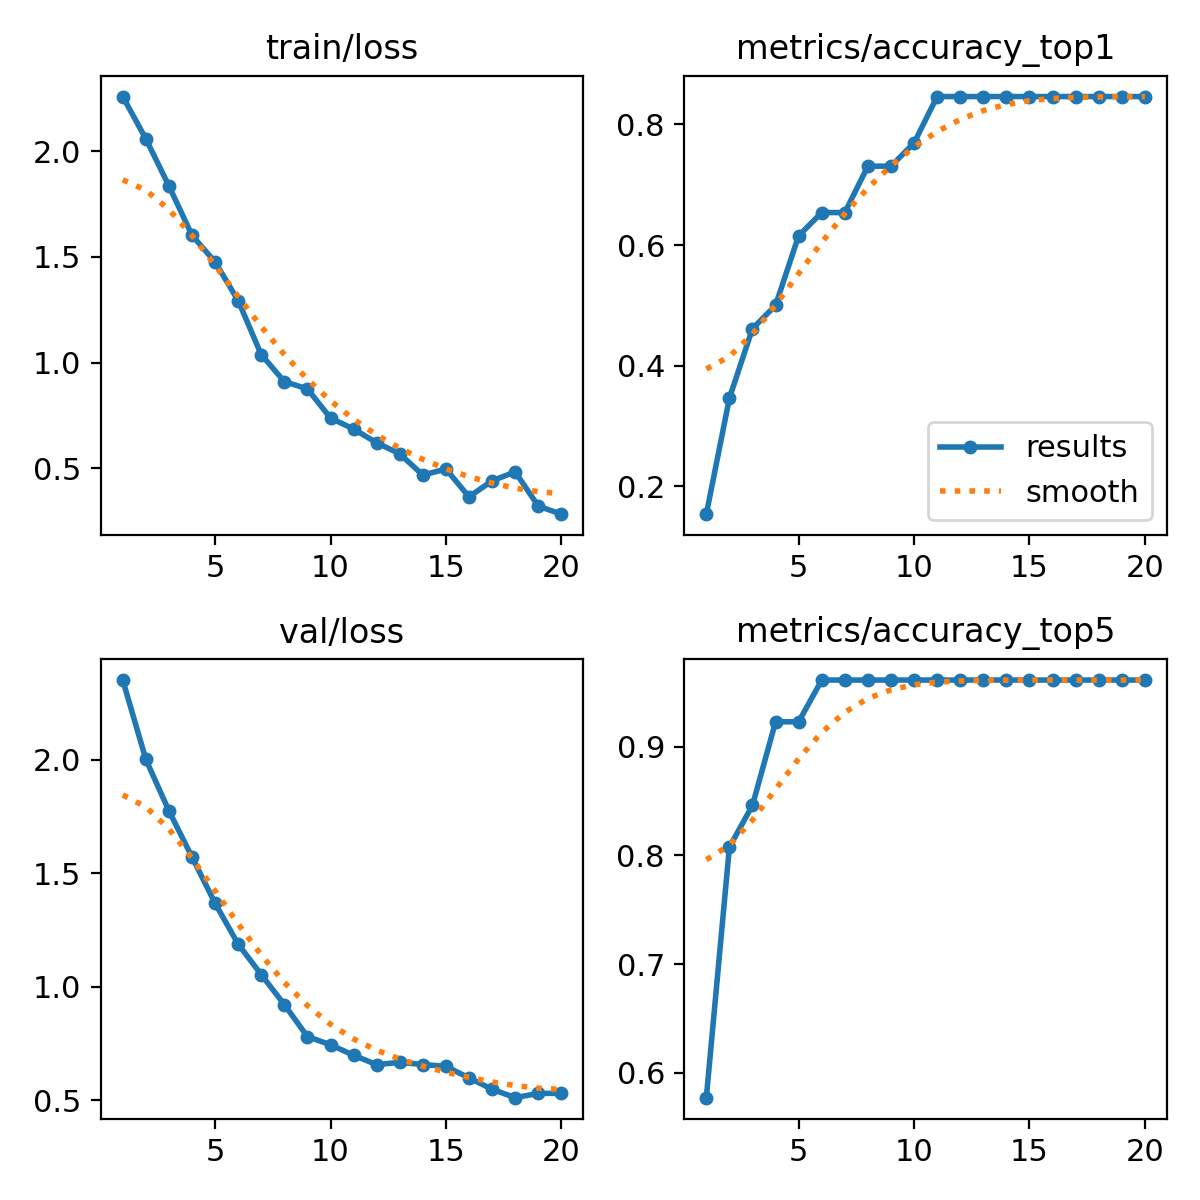

In [ ]:
Image("/content/drive/MyDrive/MECC/Computer Vision/runs/classify/train7/results.png", width=600)


image 1/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image106_Hot cracking.png: 640x640 cracks 0.83, rupture 0.05, wear 0.04, explosion 0.03, fracture 0.02, 115.9ms
image 2/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image111_Cavitation wear.png: 640x640 wear 0.96, rupture 0.01, fatigue 0.01, fracture 0.00, leakage 0.00, 122.6ms
image 3/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image125_Erosion.png: 640x640 erosion 0.92, fatigue 0.06, fracture 0.01, wear 0.01, cracks 0.00, 102.6ms
image 4/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image126_Erosion.png: 640x640 erosion 0.96, fatigue 0.02, cracks 0.01, fracture 0.01, leakage 0.01, 95.1ms
image 5/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image129_ fatigue fracture.png: 640x640 fatigue 0.79, fracture 0.16, leakage 0.02, corrosion 0.02, erosion 0.01, 97.6ms
image 6/50 /content/drive/MyDrive/MECC/Computer Vision/test/Image132_fatigue cracking.png: 640x640 fatigue 0.94, leakage 0.03, corrosion 0.01

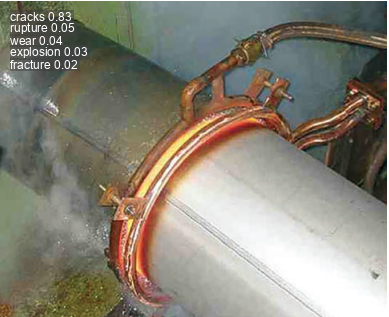

In [ ]:
model = YOLO('/content/drive/MyDrive/MECC/Computer Vision/runs/classify/train7/weights/best.pt')

results = model("/content/drive/MyDrive/MECC/Computer Vision/test") #, save=True, conf=0.5)
results[0].show()

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/MECC/Computer Vision/runs/classify/train7/weights/best.pt")

metrics = model.val(data="/content/my_dataset")

print("Top-1 Accuracy:", metrics.top1)
print("Top-5 Accuracy:", metrics.top5)



Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n-cls summary (fused): 47 layers, 1,537,553 parameters, 0 gradients, 3.2 GFLOPs
ERROR ❌ train: /content/my_dataset/train... found 240 images in 10 classes (requires 9 classes, not 10)
ERROR ❌ val: /content/my_dataset/val... found 52 images in 10 classes (requires 9 classes, not 10)
ERROR ❌ test: /content/my_dataset/test... found 52 images in 10 classes (requires 9 classes, not 10)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 305.1±60.3 MB/s, size: 58.7 KB)
val: Scanning /content/my_dataset/val... 26 images, 0 corrupt: 100% ━━━━━━━━━━━━ 26/26 15.3Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 2/2 3.1s/it 6.3s
                   all      0.846      0.962
Speed: 0.0ms preprocess, 178.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/drive/MyDrive/MECC/Computer Vision/runs/classify/val4
Top-1 Accuracy: 0.8461538553237915
Top-5 Accuracy:


image 1/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image106_Hot cracking.png: 640x640 cracks 0.83, rupture 0.05, wear 0.04, explosion 0.03, fracture 0.02, 139.5ms
image 2/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image111_Cavitation wear.png: 640x640 wear 0.96, rupture 0.01, fatigue 0.01, fracture 0.00, leakage 0.00, 287.7ms
image 3/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image125_Erosion.png: 640x640 erosion 0.92, fatigue 0.06, fracture 0.01, wear 0.01, cracks 0.00, 206.5ms
image 4/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image126_Erosion.png: 640x640 erosion 0.96, fatigue 0.02, cracks 0.01, fracture 0.01, leakage 0.01, 226.5ms
image 5/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image129_ fatigue fracture.png: 640x640 fatigue 0.79, fracture 0.16, leakage 0.02, corrosion 0.02, erosion 0.01, 258.1ms
image 6/51 /content/drive/MyDrive/MECC/Computer Vision/test/Image132_fatigue cracking.png: 640x640 fatigue 0.94, leakage 0.03, corrosion 0.

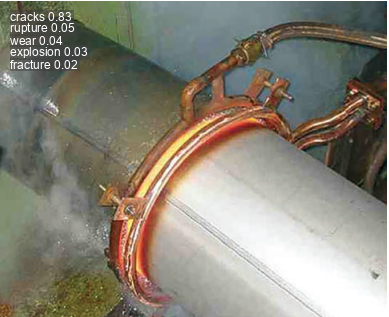

In [ ]:

results = model("/content/drive/MyDrive/MECC/Computer Vision/test", save=True, conf=0.5)
results[0].show()